<a href="https://colab.research.google.com/github/Shyam-HDS5210-01/My-projects/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Data Access and formats - from atleast two sources in formats --5pt- done
#Data merging - at least twice --5pt - done
#Data Aggregation and Pivoting -- atleast twice -5pt - done
#Data transformation -- atleast 5 times - 5pt - done
#Data visualization -- more than three -5 pt - done
#Problem Applicability - project justifies the description - 5pt -done
#Modularity/style - code break into different sections for flexibe using - 15pt-done
#Documentation and professionalism -- explanations - 15 pt-done
# showing work, work process and pseudocode - 30pt-done
# early submission - 5pts
# excellent work - 5pt

#**Trends in the Prescription Patterns and and Availability of Behavioral Modification Centers for Substance Abuse in the State of Connecticut**

The state of Connecticut has seen significant trends in prescription patterns for substance abuse, which have important implications for public health and policy. The **Trends in Substance Use in Connecticut and the Impacts of COVID-19** report highlights the changes in substance use and the importance of monitoring these trends to inform prevention and treatment strategies¹. Additionally, the availability of behavioral modification centers is crucial in providing necessary treatment and support for individuals struggling with substance abuse. The **Connecticut State Department of Mental Health and Addiction Services (DMHAS)** offers a variety of state-funded inpatient beds and treatment options, emphasizing the need for accessible care.

The type of facility care center plays a significant role in accessing substance abuse care. Different types of organizations, such as business corporations, limited liability companies (LLC), single-member LLCs, municipalities, and non-profit corporations, offer varying levels of support and resources. For instance, non-profit corporations may focus on community-based services and outreach, while business corporations might provide more specialized or intensive treatment options. The diversity in facility types ensures that individuals can find care that best suits their needs and circumstances, which is essential for effective treatment and recovery.

Overall, understanding the trends in prescription patterns and ensuring the availability of diverse behavioral modification centers are key to addressing substance abuse. The type of facility care center is also important, as it influences the accessibility and quality of care that individuals receive.





I am planning to use the data sets from various sources to evaluate the accessibility of behavior modification centers or substance abuse care facilities for individuals struggling with opioid addiction. The measure of accessibility will be the ratio of the total population to the number of centers in a particular zip code and the type of Facility center available to the population like if they're run by a business or a non-profit. The data sets need to be cleaned and organized so that related variables from each set can be combined into a single, meaningful data set. I will explore the relationship between these variables using various visualizations. The locations of these centers will be displayed on a geographical map based on zip codes. This will provide a clear picture of the distribution and accessibility of these centers for those in need.



#Data sets

***Connecticut Population** as Excel file from https://www.macrotrends.net/states/connecticut/population

***Opioid and non-opioid drug prescriptions** as CSV from https://catalog.data.gov/dataset/opioid-vs-non-opioid-prescriptions-by-year

***New and refills of controlled substance prescriptions**as CSV from https://catalog.data.gov/dataset/new-vs-refill-controlled-substance-prescriptions

***Percent of Prescriptions Greater than 90 MME vs. All** as CSV from https://catalog.data.gov/dataset/percent-of-prescriptions-greater-than-90-mme-vs-all

***Connecticut Population by Zip Codes** as Excel from https://www.connecticut-demographics.com/zip_codes_by_population

***Substance Abuse Care Facilities** as CSV from https://data.ct.gov/Health-and-Human-Services/Substance-Abuse-Care-Facilities/htz8-fxbk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import plotly.express as px
from IPython.display import HTML

# Connecticut Population

I've brought in the 'Connecticut Population' dataset from Macrotrends.net, initially in HTML format. However, due to compatibility issues, I transferred the data into an Excel file and then uploaded it to the Colab notebook. The dataset encompasses Connecticut's population size spanning from 1900 to 2022, which will aid in determining the proportion of substance abuse care facilities relative to the population size.

#PSEUDOCODE
Upon loading the necessary libraries, the Connecticut population dataset was accessed through the `pd.read_excel` function. The dataset was then refined by selecting rows from the second to the seventh(to select data from 2016-2021), and the extraneous 'Growth' column was eliminated utilizing the `drop()` method.

In [3]:
#Load the data set
population_connecticut = pd.read_excel('/content/Connecticut population.xlsx', header=1)
#show the dataframe
population_connecticut

,Year,Population,Growth Rate
0,2022,3626205,0.0008
1,2021,3623355,0.0072
2,2020,3597362,0.0088
3,2019,3566022,-0.0024
4,2018,3574561,-0.0002
...,...,...,...
118,1904,987000,0.0154
119,1903,972000,0.0210
120,1902,952000,0.0226
121,1901,931000,0.0231


In [4]:
#Remove unnecessary columns and select the data from 2016-2021  #as we have other data available from 2016-2021
population_connecticut = population_connecticut[1:7].drop(columns='Growth Rate')
population_connecticut

,Year,Population
1,2021,3623355
2,2020,3597362
3,2019,3566022
4,2018,3574561
5,2017,3575324
6,2016,3579830


#Opioid and Non-Opioid prescriptions per year
The dataset contains data on the percentages of opioid and non-opioid prescriptions issued between 2016 and 2021. Originally presented in a stacked format, it has been restructured into a DataFrame with adjacent columns by employing a pivoting technique.

#PSEUDOCODE

The dataset detailing annual opioid and non-opioid prescription percentages was retrieved via `pd.read_csv`. The initial stacked format of the dataframe was reorganized into a side-by-side columnar structure using the `pivot_table()` function. The pivot produced the `population_drugs` table, which is indexed by 'Year' and categorizes 'Opioid/Non-Opioid Prescriptions' into columns, with 'Percent of Prescriptions' as the values, sorted in reverse chronological order by 'Year'. A left join was then executed to merge `population_drugs` with `population_connecticut`, aligning the data on the 'Year' column.

In [5]:
#opioid and non-opioid prescriptions per year
drug_prescriptions = pd.read_csv('/content/Opioid_vs_Non-Opioid_Prescriptions_by_Year.csv')
drug_prescriptions

,Year,Opioid/Non-Opioid Prescriptions,Percent of Prescriptions
0,2016,Non-Opioid,0.6400
1,2016,Opioid,0.3600
2,2017,Non-Opioid,0.6785
3,2017,Opioid,0.3215
4,2018,Non-Opioid,0.7161
5,2018,Opioid,0.2839
6,2019,Non-Opioid,0.7345
7,2019,Opioid,0.2655
8,2020,Non-Opioid,0.7903
9,2020,Opioid,0.2097


In [6]:

# drug_prescription = drug_prescriptions.pivot(index='Year' columns='Opioid/Non-Opioid Prescriptions', values='Percent of Prescriptions')
# drug_prescriptions
# #  create a more side by side data through Pivoting
# # drug_prescription = drug_prescriptions.pivot(index='Year', columns='Opioid/Non-Opioid Prescriptions', values='Percent of Prescriptions', header =1)
# drug_prescriptions = drug_prescriptions.pivot_table(index='Year', columns='Opioid/Non-Opioid Prescriptions', values='Percent of Prescriptions')
# drug_prescriptions.reset_index(inplace=True)
# # Sorting the DataFrame by 'Year' in descending order
# drug_prescriptions = drug_prescriptions.sort_values(by='Year', ascending=false)
# drug_prescriptions.reset_index(drop=True, inplace=True)
# drug_prescriptions

In [7]:
#  create a more side by side data through Pivoting
drug_prescriptions = drug_prescriptions.pivot_table(index='Year', columns='Opioid/Non-Opioid Prescriptions', values='Percent of Prescriptions')
drug_prescriptions.reset_index(inplace=True)
# Sorting the DataFrame by 'Year' in descending order
drug_prescriptions = drug_prescriptions.sort_values(by='Year', ascending=False)
drug_prescriptions.reset_index(drop=True, inplace=True)
drug_prescriptions

Opioid/Non-Opioid Prescriptions,Year,Non-Opioid,Opioid
0,2021,0.8440,0.1560
1,2020,0.7903,0.2097
2,2019,0.7345,0.2655
3,2018,0.7161,0.2839
4,2017,0.6785,0.3215
5,2016,0.6400,0.3600


 I've updated the prescription information, and now I need to put it together with the population information we made before. This will give us one big set of data that has everything we need.

In [8]:
# # combine prescription and population dfs as new prescription df
# drug_df = drug_df.merge(population_connecticut, how='left')
# # combine prescription and population dfs as new prescription df
# drug_df = drug_df.merge(population_connecticut, how='left',on = 'Year')
#population_drugs
# # merged prescription df
# drug_df
# combine prescription and population dfs as new prescription df
# population_drugs =population_drugs.merge(population_connecticut,on = 'Year' ,how='left')

# # merged prescription df
# population_drugs
# population_drugs =drug_prescriptions.sort_index(ascending=False)

# #combine prescription and population dfs as new prescription df
# population_drugs =drug_prescriptions.merge(population_connecticut,on = 'Year' ,how='left')
# population_drugs

In [9]:
#combine prescription and population dfs as new prescription df
population_drugs =drug_prescriptions.merge(population_connecticut,on = 'Year' ,how='left')
population_drugs

,Year,Non-Opioid,Opioid,Population
0,2021,0.8440,0.1560,3623355
1,2020,0.7903,0.2097,3597362
2,2019,0.7345,0.2655,3566022
3,2018,0.7161,0.2839,3574561
4,2017,0.6785,0.3215,3575324
5,2016,0.6400,0.3600,3579830


#Percent of Prescriptions that are > 90 MME vs All
The dataset includes details on the percentages of medications prescribed at doses either greater than 90 MME or less. We've rearranged the data into a side-by-side format using pivoting. After that, we combined it with the earlier `population_drugs` data.

#PSEUDOCODE
The dataset containing the Percent of Prescriptions greater than 90 MME versus all was loaded with `pd.read_csv`. The data, initially in a stacked layout, was reorganized into a side-by-side format by applying a pivot with `pivot_table()`. The resulting table named `percent_prescriptions_90mme` is indexed by 'Year', with columns for 'Morphine Milligram Equivalents (MME)', and values showing the 'Percent of Prescriptions', sorted in reverse order by 'Year'. This table, `percent_prescriptions_90mme`, was then combined with the `population_drugs` data using a left join, matching on the 'Year'.

In [10]:
#Load the percent of prescriptions that are >90 MME vs All data
percent_prescriptions_90mme = pd.read_csv('/content/Percent_of_Prescriptions_Greater_than_90_MME_vs._All.csv')
percent_prescriptions_90mme

,Year,Morphine Milligram Equivalents (MME),Percent of Prescriptions
0,2016,MME > 90,8.00
1,2016,MME < 90,92.00
2,2017,MME > 90,7.73
3,2017,MME < 90,92.27
4,2018,MME > 90,7.40
5,2018,MME < 90,92.60
6,2019,MME > 90,3.07
7,2019,MME < 90,96.93
8,2020,MME > 90,2.40
9,2020,MME < 90,97.60


In [11]:

# # percent_prescriptions_90mme = percent_prescriptions_90mme.pivot_table(index='Year', columns='Morphine Milligram quivalents (MME)', values='Percent of Prescriptions')
# # percent_prescriptions_90mme.reset_index(inplace=True)
# #Pivot the data frame to get side by side data frame
# percent_prescriptions_90mme = percent_prescriptions_90mme.pivot_table(index='Year', columns='Morphine Milligram Equivalents (MME)', values='Percent of Prescriptions')
# percent_prescriptions_90mme.reset_index(inplace=True)
# # # Sorting the DataFrame by 'Year' in descending order
# # percent_prescriptions_90mme = percent_prescriptions_90mme.sort_values(by='Year', ascending=False)
# # percent_prescriptions_90mme
# # Sorting the DataFrame by 'Year' in descending order
# percent_prescriptions_90mme = percent_prescriptions_90mme.sort_values(by='Year', ascending=False)
# percent_prescriptions_90mme.reset_index(drop=True inplace=True)
# percent_prescriptions_90mme

In [12]:
#Pivot the data frame to get side by side data frame
percent_prescriptions_90mme = percent_prescriptions_90mme.pivot_table(index='Year', columns='Morphine Milligram Equivalents (MME)', values='Percent of Prescriptions')
percent_prescriptions_90mme.reset_index(inplace=True)
# Sorting the DataFrame by 'Year' in descending order
percent_prescriptions_90mme = percent_prescriptions_90mme.sort_values(by='Year', ascending=False)
percent_prescriptions_90mme.reset_index(drop=True, inplace=True)
percent_prescriptions_90mme

Morphine Milligram Equivalents (MME),Year,MME < 90,MME > 90
0,2021,98.30,1.70
1,2020,97.60,2.40
2,2019,96.93,3.07
3,2018,92.60,7.40
4,2017,92.27,7.73
5,2016,92.00,8.00


In [13]:
# # population_drugs_mme =percent_prescriptions_90mm.merge(population_drugs,on = 'Year' ,how='left')
# population_drugs_mme =percent_prescriptions_90mme.merge(population_drugs,on = 'Year' ,how='left')
# #reorder the column positions
# # population_drugs_mme = population_drugs_mme['Year', 'Non-Opioid','Opioid', 'MME < 90''MME > 90', 'Population']]
# population_drugs_mme
# #reorder the column positions
# population_drugs_mme = population_drugs_mme[['Year', 'Non-Opioid','Opioid', 'MME < 90', 'MME > 90', 'Population']]
# population_drugs_mme

In [14]:
#merge the above data with 'population_drugs'
population_drugs_mme =percent_prescriptions_90mme.merge(population_drugs,on = 'Year' ,how='left')
#reorder the column positions
population_drugs_mme = population_drugs_mme[['Year', 'Non-Opioid','Opioid', 'MME < 90', 'MME > 90', 'Population']]
population_drugs_mme

,Year,Non-Opioid,Opioid,MME < 90,MME > 90,Population
0,2021,0.8440,0.1560,98.30,1.70,3623355
1,2020,0.7903,0.2097,97.60,2.40,3597362
2,2019,0.7345,0.2655,96.93,3.07,3566022
3,2018,0.7161,0.2839,92.60,7.40,3574561
4,2017,0.6785,0.3215,92.27,7.73,3575324
5,2016,0.6400,0.3600,92.00,8.00,3579830


#New vs Refill Controlled Substance Prescriptions

This dataset provides details on both new and refill prescriptions, which reflects the ongoing medication needs of individuals, suggesting their reliance on these drugs. The data was rearranged into a new format using pivoting and then combined with the above data frame `population_drugs_mme`.

#PSEUDOCODE
The dataset titled 'New vs Refill Controlled Substance Prescriptions' was loaded using `pd.read_csv`. The dataframe, initially containing stacked data, was transformed into side-by-side data through pivoting with `pivot_table()`. The resulting table, `percent_prescriptions_fills`, is indexed by 'Year', with columns labeled 'Refill/New Prescriptions' and values for 'Percent of Prescriptions', all sorted in descending order by 'Year'. The table `percent_prescriptions_fills` was then merged with `percent_prescriptions_90mme` using a left join, based on the 'Year'.

In [15]:
##Load the percent New vs Refill Controlled Substance Prescriptions data
percent_prescriptions_fills = pd.read_csv('/content/New_vs._Refill__Controlled_Substance_Prescriptions.csv')
percent_prescriptions_fills

,Year,Refill/New Prescriptions,Percent of Prescriptions
0,2016,New Prescriptions,83.00
1,2016,Refill Prescriptions,17.00
2,2017,New Prescriptions,84.41
3,2017,Refill Prescriptions,15.59
4,2018,New Prescriptions,86.34
5,2018,Refill Prescriptions,13.66
6,2019,New Prescriptions,87.88
7,2019,Refill Prescriptions,12.12
8,2020,New Prescriptions,87.94
9,2020,Refill Prescriptions,12.06


In [16]:

# percent_prescriptions_fills = percent_prescriptions_fills.pivot_table(index='Year', columns='Refill New Prescriptions', values='Percent of Prescriptions')
# percent_prescriptions_fills.reset_index(inplace=True)
# percent_prescriptions_fills = percent_prescriptions_fills.sort(by='Year', ascending=False)
# percent_prescriptions_fills

In [17]:
#Pivot the data frame to get side by side data frame
percent_prescriptions_fills = percent_prescriptions_fills.pivot_table(index='Year', columns='Refill/New Prescriptions', values='Percent of Prescriptions')
percent_prescriptions_fills.reset_index(inplace=True)
# Sorting the DataFrame by 'Year' in descending order
percent_prescriptions_fills = percent_prescriptions_fills.sort_values(by='Year', ascending=False)
percent_prescriptions_fills.reset_index(drop=True, inplace=True)
percent_prescriptions_fills

Refill/New Prescriptions,Year,New Prescriptions,Refill Prescriptions
0,2021,87.59,12.41
1,2020,87.94,12.06
2,2019,87.88,12.12
3,2018,86.34,13.66
4,2017,84.41,15.59
5,2016,83.00,17.00


In [18]:
# # #merge the above data with 'population_drugs_mme'
# # connecticut_drug_data =population_drugs_mme.merge(percent_prescriptions_fills,on = 'year' ,how='left') #wrong merging
# connecticut_drug_data =percent_prescriptions_fills.merge(population_drugs_mme,on = 'Year' ,how='left')
# #reorder the column positions
# connecticut_drug_data = connecticut_drug_data[['Year', 'Population','Non-Opioid','Opioid', 'MME < 90', 'MME > 90','New Prescriptions','Refill Prescriptions' ]]
# connecticut_drug_data = pd.Dataframe(connecticut_drug_data)  #wrong function
# connecticut_drug_data

In [19]:
#merge the above data with 'population_drugs_mme'
connecticut_drug_data =percent_prescriptions_fills.merge(population_drugs_mme,on = 'Year' ,how='left')
#reorder the column positions
connecticut_drug_data = connecticut_drug_data[['Year', 'Population','Non-Opioid','Opioid', 'MME < 90', 'MME > 90','New Prescriptions','Refill Prescriptions' ]]
connecticut_drug_data = pd.DataFrame(connecticut_drug_data)
connecticut_drug_data

,Year,Population,Non-Opioid,Opioid,MME < 90,MME > 90,New Prescriptions,Refill Prescriptions
0,2021,3623355,0.8440,0.1560,98.30,1.70,87.59,12.41
1,2020,3597362,0.7903,0.2097,97.60,2.40,87.94,12.06
2,2019,3566022,0.7345,0.2655,96.93,3.07,87.88,12.12
3,2018,3574561,0.7161,0.2839,92.60,7.40,86.34,13.66
4,2017,3575324,0.6785,0.3215,92.27,7.73,84.41,15.59
5,2016,3579830,0.6400,0.3600,92.00,8.00,83.00,17.00


In [20]:
# dataframe = isinstance(connecticut_drug_data, pd.DataFrame)
# dataframe

In [21]:
# connecticut_drug_data.dtypes

In [22]:
#convert the % to numbers  #I SHOULD APPLY THIS
#for loop every column-> use the formula (percentage*population/100) ->numbers will be formed -> apply the same to every column
# and pass the dataframe  through function .

# # Function to convert percentages to numbers
# def percent_to_numbers(df, columns):
#     for column in columns:
#   #      df[column] = (df(column * 'Population')/ 100)
   #df[column] = (df[column] * df['Population'] / 100)

#     return df

# # Function to convert percentages to numbers
# def convert_percent_to_numbers(df, columns):
#     for column in columns:                               #This function giving me numbers but the numbers are very long
                                                              #and i have compared them with manual results and observed a difference
#         if column != Population:                             # in the output.
#             df[column] = (df[column] * df['Population'] / 100)

#     return df
# # Function to convert percentages to numbers
# def convert_percent_to_numbers(df, columns):
#     for column in columns:
#         if column != 'Population':
#             df[column] = (df[column] * df['Population'] / 100)

#     return df

# # Columns to convert
# columns_to_convert = ['Non-Opioid', 'Opioid', 'MME < 90', 'MME > 90', 'New Prescriptions', 'Refill Prescriptions']

# # Convert and print the updated DataFrame
# df = convert_percent_to_numbers(connecticut_drug_data, columns_to_convert)
# df

In [23]:
# def calculate_values(df):

#   # select columns to be changed
#   columns = ["Non-Opioid", "Opioid", "MME < 90", "MME > 90", "New Prescriptions", "Refill Prescriptions"]
#   # Loop through the columns and apply the formula
#   for col in columns:
#     calculated_data[col] = round((df[col] * df["Population"]) / 100)     #Uses the formula = (Percentage*Population)/100
#        return df
#   #pass the data frame through function       # error applying the function to the dataframe
# df = calculate_values(connecticut_drug_data)
# df

 # select columns to be changed
#   columns = ["Non-Opioid", "Opioid", "MME < 90", "MME > 90", "New Prescriptions", "Refill Prescriptions"]
#   # Loop through the columns and apply the formula
#   for col in columns:
#     calculated_data[col] = round((df[col] * df["Population"]) / 100)     #Uses the formula = (Percentage*Population)/100
#        return df

# # for columns withour percentage
#   for col in df.columns:
#     if col not in columns:
#       calculated_data[col] = df[col]
    # return calculated_data

  #pass the data frame through function
# calculated_data = calculate_values(connecticut_drug_data)
# calculated_data

 # select columns to be changed
#   columns = ["Non-Opioid", "Opioid", "MME < 90", "MME > 90", "New Prescriptions", "Refill Prescriptions"]
#   # Loop through the columns and apply the formula
#   for col in columns:
#     calculated_data[col] = round((df[col] * df["Population"]) / 100)     #Uses the formula = (Percentage*Population)/100
# # for columns withour percentage
#   for col in df.columns:
#     if col not in columns:
#       calculated_data[col] = df[col]
    # return calculated_data
    # calculated_data = pd.DataFrame(index=df.index, columns=df.columns)
  #pass the data frame through function
# calculated_data = calculate_values(connecticut_drug_data)
# calculated_data


#Convert the prescriptions from Percents to numbers & Calculate total prescriptions/person
#PSEUDOCODE

This code defines a function calculate_values that takes a DataFrame as input and returns a new DataFrame with the specified columns converted from percentages to numbers. The function first selects the columns to apply the formula to, then creates a new DataFrame to store the calculated values using `pd.DataFrame`. It then iterates through the specified columns with the help of `for` loop and applies the formula `formula = (Percentage*Population)/100` to each column. Finally, it copies the other columns from the original DataFrame to the new DataFrame and returns it. Then the data is passed through the function to get a new DataFrame.

In [24]:

def calculate_values(data):
  """
  (float)->int
  This function converts the values of columns from percents to numbers
  using the formula'percentage * population / 100' to specified columns in a DataFrame and round it off to nearest whole
  number if the value has percentage if not leaves the number unchanged.
  """

  # select columns to apply the formula to
  percent_columns = ["Non-Opioid", "Opioid", "MME < 90", "MME > 90", "New Prescriptions", "Refill Prescriptions"]
# Create a new DataFrame to store the calculated values
  calculated_data = pd.DataFrame(index=data.index, columns=data.columns)

  # Loop through the columns and apply the formula
  for col in percent_columns:
    calculated_data[col] = round((data[col] * data["Population"]) / 100)     #Uses the formula = (Percentage*Population)/100

  # Copy other columns from the original DataFrame
  for col in data.columns:
    if col not in percent_columns:
      calculated_data[col] = data[col]

  return calculated_data
  #pass the data frame through function
calculated_data = calculate_values(connecticut_drug_data)
calculated_data



,Year,Population,Non-Opioid,Opioid,MME < 90,MME > 90,New Prescriptions,Refill Prescriptions
0,2021,3623355,30581.0,5652.0,3561758.0,61597.0,3173697.0,449658.0
1,2020,3597362,28430.0,7544.0,3511025.0,86337.0,3163520.0,433842.0
2,2019,3566022,26192.0,9468.0,3456545.0,109477.0,3133820.0,432202.0
3,2018,3574561,25597.0,10148.0,3310043.0,264518.0,3086276.0,488285.0
4,2017,3575324,24259.0,11495.0,3298951.0,276373.0,3017931.0,557393.0
5,2016,3579830,22911.0,12887.0,3293444.0,286386.0,2971259.0,608571.0


Here the percentages of prescriptions in various columns are converted into numbers. so that we are able to find the number of prescriptions per person in each category in each year.

In [25]:
# #calculate the perscriptions/person
# calculated_data['opioid/Person'] = calculated_data('Opioid' / 'Population')
# calculated_data
# calculated_data['opioid/Person'] = calculated_data['Opioid'] / calculated_data['Population']
# calculated_data

In [26]:
#calculate the perscriptions/person
calculated_data['opioid/Person'] = calculated_data['Opioid'] / calculated_data['Population']
calculated_data['MME>90/person'] = calculated_data['MME > 90'] / calculated_data['Population']
calculated_data['Refill Prescriptions/person'] = calculated_data['Refill Prescriptions'] / calculated_data['Population']
calculated_data

,Year,Population,Non-Opioid,Opioid,MME < 90,MME > 90,New Prescriptions,Refill Prescriptions,opioid/Person,MME>90/person,Refill Prescriptions/person
0,2021,3623355,30581.0,5652.0,3561758.0,61597.0,3173697.0,449658.0,0.001560,0.0170,0.1241
1,2020,3597362,28430.0,7544.0,3511025.0,86337.0,3163520.0,433842.0,0.002097,0.0240,0.1206
2,2019,3566022,26192.0,9468.0,3456545.0,109477.0,3133820.0,432202.0,0.002655,0.0307,0.1212
3,2018,3574561,25597.0,10148.0,3310043.0,264518.0,3086276.0,488285.0,0.002839,0.0740,0.1366
4,2017,3575324,24259.0,11495.0,3298951.0,276373.0,3017931.0,557393.0,0.003215,0.0773,0.1559
5,2016,3579830,22911.0,12887.0,3293444.0,286386.0,2971259.0,608571.0,0.003600,0.0800,0.1700


The number of prescriptions per person were calculated with the help of below  calculation  and new columns were created.

**Type of prescription/ person =  Type of presription / Population **

#VISUALIZATIONS
#PSEUDOCODE
**Graph 1: Distribution of various prescriptions**
<br>
A box plot showcasing the range of prescription types was created, featuring variables such as 'Non-Opioid', 'Opioid', 'MME < 90', 'MME > 90', 'New Prescriptions', and 'Refill Prescriptions'. The title for the chart was added using `plt` from `matplotlib`.

<br>

**Graph 2: Population Trends Over Years**
<br>
Using the `calculated_data`, a line chart was drawn to depict the population changes year by year. The 'Year' was plotted on the x-axis and 'Population' on the y-axis, with the line color chosen as 'BLUE'. The axes were labeled correctly, a title was provided, and the legend was positioned suitably.

<br>

**Graph 3: Prescription Trends Over Years (2016-2021)**
<br>
A line chart was created to display the trends in different prescription categories over time. This was achieved by setting up a `for` loop to cycle through the specified columns and 'year', plotting the prescription data across the years. The chart was then labeled appropriately and titled using `plt`.

<br>

**Graph 4: Trends of Opioid per person Prescriptions Over Years**
<br>
Utilizing the dataset `calculated_data`, a line graph representing the Trends of Opioid per person Prescriptions Over Years was created. The 'Year' was plotted along the x-axis, and 'opioid/Person' along the y-axis, with the graph line color designated as 'red'. Both axes were labeled accordingly, a title was applied, and the legend was properly positioned.

<br>


**Graph 5: Bar Plots of Drug Prescriptions Over Years**
<br>
With the `calculated_data`, a comparative bar chart illustrating Drug Prescriptions Over Years was constructed. The x-axis displayed 'Year', while the y-axis showed 'Non-Opioid' and 'Opioid' categories, with the chart type specified as `bar`. Labels were added to both axes, a title was included, and the legend was adjusted for clarity.

<br>

**Graph 6: Bar Plots of Drug Prescriptions Over Years**
<br>
Employing the `calculated_data`, a side-by-side bar chart was generated to depict Drug Prescriptions Over Years. 'Year' was featured on the x-axis, and 'MME < 90', 'MME > 90', 'New Prescriptions', 'Refill Prescriptions' were presented on the y-axis, with the chart type set to `bar`. The axes were labeled appropriately, a title was assigned, and the legend was fine-tuned.

<br>

**Graph 7: Percent Distribution of Prescriptions for the Year 2021**
A pie chart was created to show the Percent Distribution of Prescriptions for the Year 2021. Data corresponding to `year = 2021` was extracted from `calculated_data`, and the relevant columns were chosen for the chart. The initial value from each column, representing the 2021 data, was retrieved using `values[0]` and labeled as `Percent`. The `autopct='%1.1f%%'` parameter was utilized to format the percentages with one digit before and one digit after the decimal point. The `startangle=120` parameter oriented the starting slice of the pie chart at 120 degrees. An appropriate title was then added to the chart.

A similar pie chart was also constructed for the data of `Year = 2016` to compare the percentage distribution changes between the two years.



####**Graph 1 : Distribution of various prescriptions**

The box plot reveals the distribution patterns for different prescription categories, including 'Non-Opioid', 'Opioid', 'MME < 90', 'MME > 90', 'New Prescriptions', and 'Refill Prescriptions'. Each category displays a non-normal or skewed distribution, characterized by varying lengths of the upper and lower whiskers. It appears that 'MME < 90' has the highest total number of prescriptions, followed by 'New Prescriptions', with 'Opioid' Prescriptions being the least common.

In [27]:
# #Box plots of the given variables to check the distributions
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=calculated_data[['Non-Opioid', 'Opioid', 'MME < 90', 'MME > 90', 'New Prescriptions', 'Refill Prescriptions']])
# plt.title('Distribution of Prescriptions Data')
# plt.show()

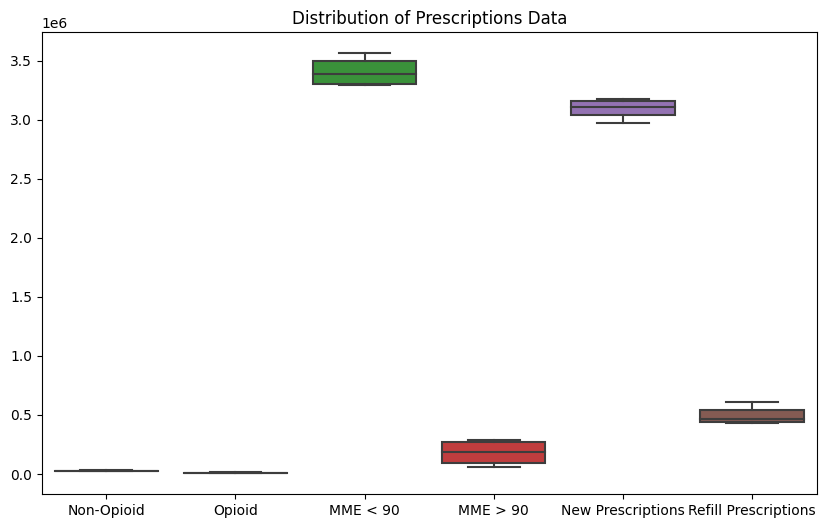

In [28]:
# #Box plots of the given variables to check the distributions
plt.figure(figsize=(10, 6))
sns.boxplot(calculated_data[['Non-Opioid', 'Opioid', 'MME < 90', 'MME > 90', 'New Prescriptions', 'Refill Prescriptions']])
plt.title('Distribution of Prescriptions Data')
plt.show()

####**Graph 2: Population Trends Over Years**
The line graph indicates that the population began to decline starting in 2016, remained relatively stable from 2017 to 2018, and then experienced a further decrease from 2018 to 2019. There was a sharp and steady rise in the population from 2019 through 2021. The factors contributing to this decline could be multifaceted, potentially including public health emergencies or other crises.

In [29]:
# plt.figure(figsize=(10, 6))

# plt.plot(connecticut_drug_data['Year'], connecticut_drug_data['Opioid','Non-Opioid','>90 MME','<90 MME','New Prescriptions','Refill Prescriptions'], marker='o', label='Opioid')
# # Adding labels and title
# plt.xlabel('Year')
# plt.ylabel('Number of Prescriptions')
# plt.title('Prescription Trends Over Years')
# plt.legend()
# plt.grid(True)

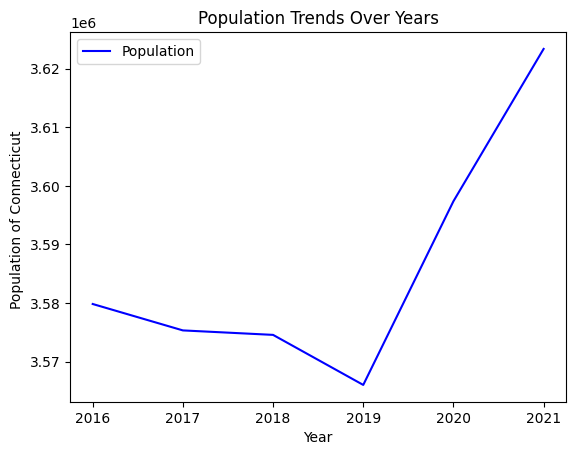

In [30]:
#Plot line graph showing trends of Population over years
calculated_data.plot(x='Year', y='Population', color='BLUE')
plt.xlabel('Year')
plt.ylabel('Population of Connecticut ')
plt.title('Population Trends Over Years')
plt.legend()
# Show the plot
plt.show()

####** Graph 3 :Prescription Trends Over Years (2016-2021)**

The line plot illustrates the progression of different substance drug categories from 2016 to 2021. The usage of both opioid and non-opioid drugs has remained relatively stable throughout this period. An increase is noticeable in 'MME < 90' and 'New Prescriptions', suggesting a rise in the consumption of these substance drugs. Conversely, there is a decline in 'MME > 90' and 'Refill Prescriptions', which may be attributed to the implementation of stricter regulations or the introduction of new public health initiatives.


In [31]:
# #Plot line graph showing trends of Population over years
# columns = ['Non-Opioid','Opioid', 'MME < 90', 'MME > 90', 'New Prescriptions', 'Refill Prescriptions']
# calculated_data.plot(x='Year', y='columns', color='BLUE')
# plt.xlabel('Year')
# plt.ylabel('Percent of Prescriptions')
# plt.title('Prescription Trends Over Years')
# plt.legend()
# # Show the plot
# plt.show()

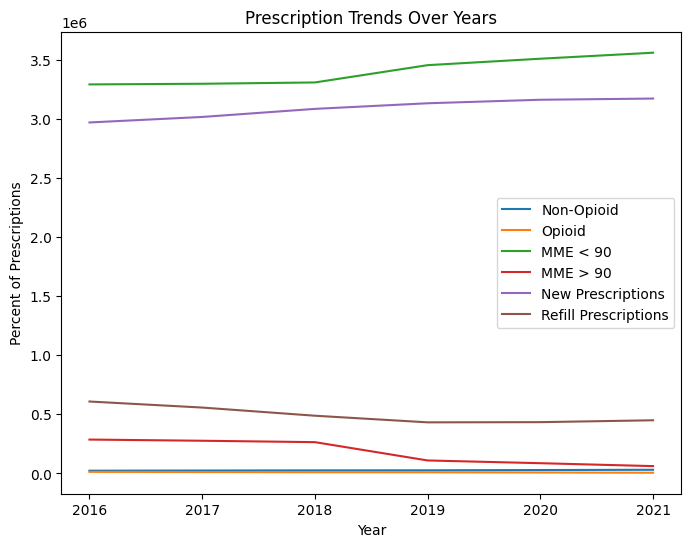

In [32]:
#Plot line graph for prescription trends over years
plt.figure(figsize=(8, 6))
# Loop through the columns and plot each one
for column in ['Non-Opioid','Opioid', 'MME < 90', 'MME > 90', 'New Prescriptions', 'Refill Prescriptions']:
    plt.plot(calculated_data['Year'], calculated_data[column],  label=column)
# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Percent of Prescriptions')
plt.title('Prescription Trends Over Years')
plt.legend()
# Show the plot
plt.show()


####**Graph 4: Trends of Opioid per person Prescriptions Over Years**
The line plot demonstrates a decreasing pattern in the per capita opioid prescriptions from the year 2016 through 2021.

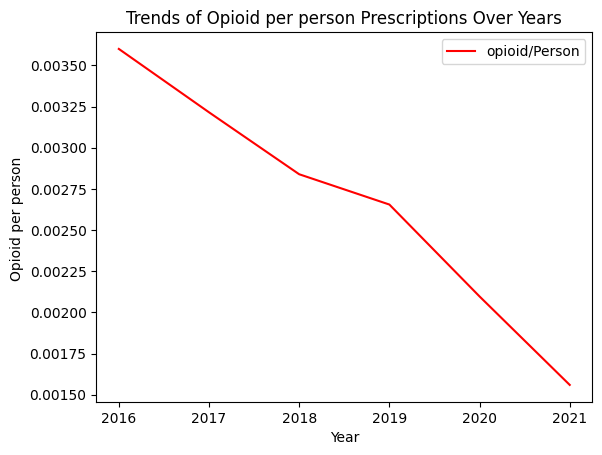

In [33]:
#Plot line graph showing trends of opioid/Person over years
calculated_data.plot(x='Year', y='opioid/Person', color='red')
plt.xlabel('Year')
plt.ylabel('Opioid per person ')
plt.title('Trends of Opioid per person Prescriptions Over Years')
plt.legend()
# Show the plot
plt.show()

In [34]:
# plt.figure(figsize=(10, 6))

# # Loop through the columns and plot each one
# for column in ['Non-Opioid','Opioid', 'MME < 90', 'MME > 90', 'New Prescriptions', 'Refill Prescriptions']:
#     plt.plot(connecticut_drug_data['Population'], connecticut_drug_data[column], marker='o', label=column)
# # Adding labels and title
# plt.xlabel('Population')
# plt.ylabel('Number of Prescriptions')
# plt.title('Prescription Trends Over Years')
# plt.legend()
# # Show the plot
# plt.show()


In [35]:
# #Plot bar plot showing trends of prescriptions over years
# plt.figure(figsize=(10, 6))

# # Loop through the columns and plot each one as a bar plot
# for column in ['Opioid', 'Non-Opioid', 'MME < 90', 'MME > 90', 'New Prescriptions', 'Refill Prescriptions']:
#     plt.bar(connecticut_drug_data['Year'], connecticut_drug_data[column], label=column, alpha=0.7)
# # Adding labels and title
# plt.xlabel('Year')
# plt.ylabel('Percent of Prescriptions')
# plt.title('Prescription Trends Over Years')
# plt.legend()
# # Show the plot
# plt.show()


In [36]:
#Bar plot of Opiod and non-Opioid prescriptions over years
# connecticut_drug_data.plot(x='Population', y=['Non-Opioid','Opioid'])

####**Graph 5: Bar Plots of Drug Prescriptions Over Years**

The bar charts depict the quantity of prescriptions for each category, 'opioid' and 'non-opioid'. It is evident that non-opioid prescriptions outnumber opioid ones. However, a closer look at the trends reveals a decline in opioid prescriptions over time, while non-opioid prescriptions have shown an upward trajectory from 2016 to 2021.

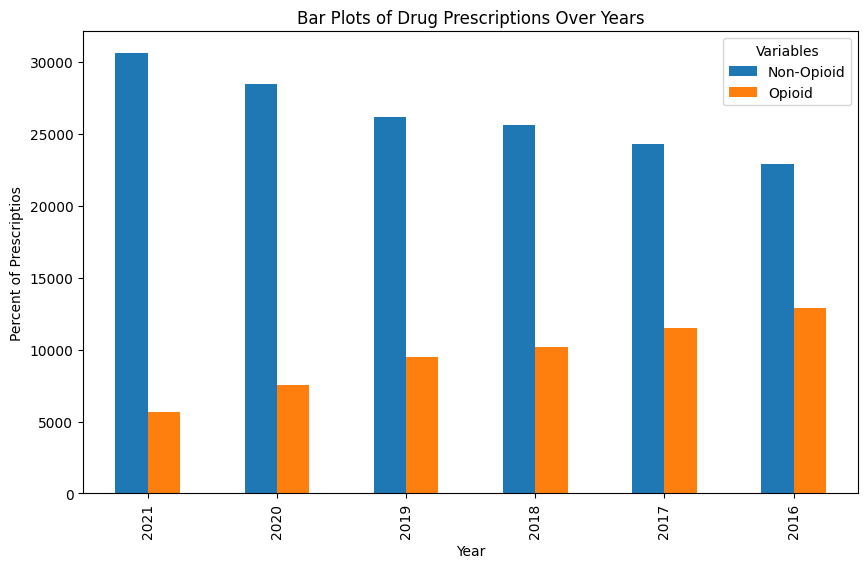

In [37]:
#Bar plot of Opiod and non-Opioid prescriptions over years
calculated_data.plot(x='Year', y=['Non-Opioid','Opioid'], kind='bar', figsize=(10, 6))

# Label the plot
plt.title('Bar Plots of Drug Prescriptions Over Years')
plt.xlabel('Year')
plt.ylabel('Percent of Prescriptios')
plt.legend(title='Variables')

# show the plot
plt.show()


####**Graph 6:Bar Plots of Drug Prescriptions Over Years**
The bar plots provided below showcase the distribution of drug prescriptions across different categories over the years. It is apparent that the 'MME < 90' category has the highest prescription rate, followed by 'New Prescriptions'. 'Refill Prescriptions' rank third, and the 'MME > 90' category has the lowest prescription count.

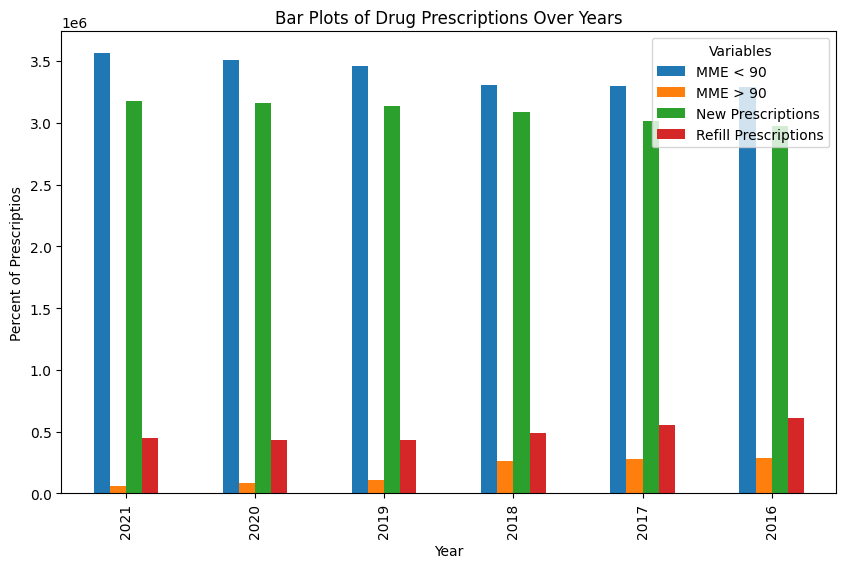

In [38]:

# Plotting the bar plots for other variables
calculated_data.plot(x='Year', y=['MME < 90', 'MME > 90', 'New Prescriptions', 'Refill Prescriptions'], kind='bar', figsize=(10, 6))

# Label the plot
plt.title('Bar Plots of Drug Prescriptions Over Years')
plt.xlabel('Year')
plt.ylabel('Percent of Prescriptios')
plt.legend(title='Variables')

# show the plot
plt.show()


####**Graph 7: Percent Distribution of Prescriptions for the Year 2021**
From the pie chart we can see the percentage of each category of precriptions in the year 2021. The results are as follows:

Non-Opioid: 0.4%

Opioid : 0.1%

MME < 90: 48.9%

MME > 90: 0.8%

New Prescriptions : 43.6%

Refill Prescriptions:6.2%


  ####             **Percent Distribution of Prescriptions for the Year 2016**

  Non-Opioid: 0.3%

Opioid : 0.2%

MME < 90:  45.8%

MME > 90: 4.0%

New Prescriptions : 41.3%

Refill Prescriptions:8.5%

A decline in the percentages of Refill Prescriptions, MME > 90, and opioid prescriptions is noted from 2016 to 2021. Conversely, the remaining prescription categories have experienced an increase in their respective percentages over the same period.


In [39]:
# # Select the data for the year 2021
# data_2021 = connecticut_drug_data[connecticut_drug_data['Year'] == 2021]
# # Columns to include in the pie plot
# columns = ['Non-Opioid',  'MME < 90', 'MME > 90', 'New Prescriptions', 'Opioid','Refill Prescriptions']
# # Plot the pie plot
# plt.figure(figsize=(10, 6))
# plt.pie(data_2021, labels=columns)
# plt.title('Prescription Distribution for the Year 2021')
# plt.show()

In [40]:
# # Select the data for the year 2021
# data_2021 = connecticut_drug_data[connecticut_drug_data['Year'] == 2021]
# # Columns to include in the pie plot
# columns = ['Non-Opioid',  'MME < 90', 'MME > 90', 'New Prescriptions', 'Opioid','Refill Prescriptions']
# # Plot the pie plot
# plt.figure(figsize=(10, 6))
# plt.pie(data_2021, labels=columns, startangle=120)
# plt.title('Prescription Distribution for the Year 2021')
# plt.show()

In [41]:
# # Select the data for the year 2021
# data_2021 = connecticut_drug_data[connecticut_drug_data['Year'] == 2021]
# # Columns to include in the pie plot
# columns = ['Non-Opioid',  'MME < 90', 'MME > 90', 'New Prescriptions', 'Opioid','Refill Prescriptions']  #need to fill the pies with values of percents
#Percent = [data_2021[column].values]
# # Plot the pie plot
# plt.figure(figsize=(10, 6))
# plt.pie(data_2021, labels=columns,autopct='%0.2f%%', startangle=120)
# plt.title('Prescription Distribution for the Year 2021')
# plt.show()
 # Select the data for the year 2021
# data_2021 = connecticut_drug_data[connecticut_drug_data['Year'] == 2021]
# # Columns to include in the pie plot
# columns = ['Non-Opioid',  'MME < 90', 'MME > 90', 'New Prescriptions', 'Opioid','Refill Prescriptions']  #need to fill the pies with values of percents
#Percent = [data_2021[column].values]
# # Plot the pie plot
# plt.figure(figsize=(10, 6))
# plt.pie(data_2021, labels=columns,autopct='%1.1f%%', startangle=120)
# plt.title('Prescription Distribution for the Year 2021')
# plt.show()

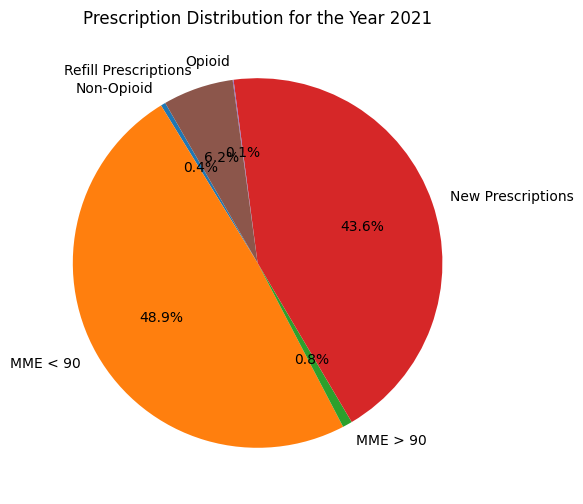

In [42]:

# Select the data for the year 2021
data_2021 = calculated_data[calculated_data['Year'] == 2021]
# Columns to include in the pie plot
columns = ['Non-Opioid',  'MME < 90', 'MME > 90', 'New Prescriptions', 'Opioid','Refill Prescriptions']
# Values for the pie plot
Percent = [data_2021[column].values[0] for column in columns]
# Plot the pie plot
plt.figure(figsize=(10, 6))
plt.pie(Percent, labels=columns,autopct='%1.1f%%', startangle=120)
plt.title('Prescription Distribution for the Year 2021')
plt.show()


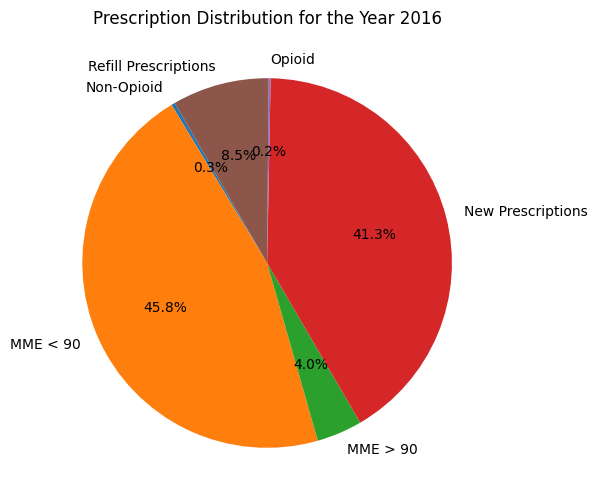

In [43]:
# Selecting the data for the year 2016
data_2016 = calculated_data[calculated_data['Year'] == 2016]
# Columns to include in the pie plot
columns = ['Non-Opioid',  'MME < 90', 'MME > 90', 'New Prescriptions', 'Opioid','Refill Prescriptions']
# Values for the pie plot
percent = [data_2016[column].values[0] for column in columns]
# Plotting the pie plot
plt.figure(figsize=(10, 6))
plt.pie(percent, labels=columns, autopct='%1.1f%%', startangle=120)
plt.title('Prescription Distribution for the Year 2016')
plt.show()


#Connecticut Population by Zipcodes

The dataset contains details on the total population for each zipcode in Connecticut. To ensure the zipcodes are valid and active, a '0' has been added at the beginning of each code within the data.

#PSEUDOCODE

The data file was accessed using `pd.read_excel`, and the `Rank` column was eliminated since it was not relevant to our analysis. Modifications to the data included renaming the `Zip` column to `Zip Code` and transforming `population_zip` into a dataframe with `pd.DataFrame`.





In [44]:
population_zip = pd.read_excel('/content/zipcodes connecticut.xlsx')
population_zip = population_zip.drop(columns = 'Rank')
population_zip

,Zip Code,Population
0,6902,69523
1,6010,60745
2,6516,55518
3,6511,54856
4,6810,53931
...,...,...
282,6079,43
283,6059,38
284,6020,37
285,6758,32


In [45]:
df = pd.DataFrame(population_zip)
df

,Zip Code,Population
0,6902,69523
1,6010,60745
2,6516,55518
3,6511,54856
4,6810,53931
...,...,...
282,6079,43
283,6059,38
284,6020,37
285,6758,32


In [46]:
# dataframe = isinstance(df, pd.DataFrame)
# dataframe

In [47]:
df.rename(columns={'Zip Code': 'Zip'}, inplace=True)  # name changed to make the dataframe joining easier
df

,Zip,Population
0,6902,69523
1,6010,60745
2,6516,55518
3,6511,54856
4,6810,53931
...,...,...
282,6079,43
283,6059,38
284,6020,37
285,6758,32


#PSEUDOCODE
The `format_zip_codes` function was developed to include a dataframe `df`. By applying `astype(str)`, it ensures that all values are converted to strings for uniform processing. The expression `str[:5]` extracts only the first 5 characters of the string, which serves to truncate the final 4 digits from 8-digit ZIP codes and to prepend leading zeros where necessary. The function then returns the modified dataframe. When this function is applied to the dataframe, the result is a new dataframe `zip_new` that contains properly formatted zip codes.


In [48]:
# def format_zip_codes(df):
#   df["Zip"] = df["Zip"].astype(str)
#   df["Zip"] = df["Zip"].textcenter(5)
#   return df
# def format_zip_codes(df):
#   df["Zip"] = df["Zip"].astype(str)
#   df["Zip"] = df["Zip"].zfill(5)
#   return df
# # Apply the function to  DataFrame
# zip_new = format_zip_codes(df)
# zip_new

In [49]:
# population_zip = population_zip.rename(columns={'Zip Code': 'Zip'}, inplace=True)
# population_zip.head(2)

In [50]:
# # population_zip = pd.read_excel('/content/Connecticut_DemographicsByZipCode_sample (2).xlsx')
# population_zip = pd.read_excel('/content/Connecticut_DemographicsByZipCode_sample (2).xlsx', header=4)

# # population_zip = population_zip.drop(columns = 'Rank')
# # population_zip = population_zip.rename(columns={'Zip Code': 'Zip'}, inplace=True)
# population_zip

In [51]:
# population_zip = population_zip[['name', 'state_name', 'best_population_year', 'population']]
# population_zip = population_zip.iloc[1:]
# population_zip

In [52]:
# df = pd.DataFrame(population_zip)
# df.head()

In [53]:
# population_zip['name'] = population_zip['name'].astype(str)
# population_zip['name'].dtypes

In [54]:
# population_zip = population_zip.isnull().sum()
# population_zip

In [55]:
# dataframe = isinstance(population_zip, pd.DataFrame)
# dataframe

In [56]:
# series = isinstance(population_zip, pd.Series)
# series

In [57]:
# population_zip_df = population_zip.to_frame
# population_zip_df = isinstance(population_zip_df, pd.DataFrame)
# population_zip_df

In [58]:
# #
# population_df = population_zip.to_frame(name='population')
# dataframe = isinstance(population_df, pd.DataFrame)
# dataframe


In [59]:
# def format_zip_codes(df):
#   df["Zip"] = df["Zip"].astype(str)
#   df["Zip"] = df["Zip"].textcenter(5)
#   return df
# def format_zip_codes(df):
#   df["Zip"] = df["Zip"].astype(str)
#   df["Zip"] = df["Zip"].zfill(5)
#   return df
# # Apply the function to  DataFrame
# zip_new = format_zip_codes(df)
# zip_new

In [60]:
def format_zip_codes(df):
  """
  (DataFrame containing a column named 'Zip') ->A new DataFrame with the formatted ZIP codes)
  This function formats the Zipcodes in a DataFrame by  adding leading zeros if the zipcode less than 5 digits."""

  df["Zip"] = df["Zip"].astype(str).str.zfill(5)
  return df

# Apply the function to  DataFrame
zip_new = format_zip_codes(df)
zip_new

,Zip,Population
0,06902,69523
1,06010,60745
2,06516,55518
3,06511,54856
4,06810,53931
...,...,...
282,06079,43
283,06059,38
284,06020,37
285,06758,32


#Substance Abuse Care Facilities

This has data related to Substance Abuse Care Facilities such as Credentials, type of organization, active status, issued date, effective ,expirations dates,Address, state, zipcodes. After data modifications, this data has been joined with 'connecticut population by zipcodes' based on zipcodes.



#PSEUDOCODE
The `pd.read_csv` function was used to load the Substance Abuse Care Facilities data set into a dataframe named `df`. The `Issue Date` was then converted to datetime format using `pd.to_datetime` and sorted in descending order. Finally, the necessary columns were chosen to form a new dataframe.


In [61]:
#Load Substance abuse care facilities data
substanceabusecare_failities = pd.read_csv('/content/Substance_Abuse_Care_Facilities (1).csv')
df = substanceabusecare_failities
df

,CredentialId,Name,Type,BusinessName,DBA,FullCredentialCode,CredentialType,CredentialNumber,CredentialSubCategory,Credential,...,StatusReason,Active,IssueDate,EffectiveDate,ExpirationDate,Address,City,State,Zip,RecordRefreshedOn
0,1454363,TREATMENT PATHWAY PROGRAM,NON-PROFIT CORPORATION,TREATMENT PATHWAY PROGRAM,TREATMENT PATHWAY PROGRAM,SA.0000552,SA,552,NaN,Substance Abuse,...,CURRENT,1,10/04/2017,10/01/2023,09/30/2025,172 GOLDEN HILL ST,BRIDGEPORT,CT,66044102,08/15/2023
1,1077524,"WELLMORE, INC. WOMEN AND CHILDREN'S PROGRAM",CORPORATION,"WELLMORE, INC. WOMEN AND CHILDREN'S PROGRAM","WELLMORE, INC. WOMEN AND CHILDREN'S PROGRAM",SA.0000437,SA,437,NaN,Substance Abuse,...,CURRENT,1,06/15/2012,07/01/2022,06/30/2024,79 BEACON ST,WATERBURY,CT,67043424,08/05/2022
2,1077532,"WELLMORE, INC. THERAPEUTIC SHELTER",CORPORATION,"WELLMORE, INC. THERAPEUTIC SHELTER","WELLMORE, INC. THERAPEUTIC SHELTER",SA.0000438,SA,438,NaN,Substance Abuse,...,CURRENT,1,06/15/2012,07/01/2022,06/30/2024,142 GRIGGS ST,WATERBURY,CT,67043110,06/01/2022
3,1387959,TURNBRIDGE,CORPORATION,TURNBRIDGE,TURNBRIDGE,SA.0000524,SA,524,NaN,Substance Abuse,...,CURRENT,1,11/04/2016,10/01/2022,09/30/2024,189 ORANGE ST,NEW HAVEN,CT,65102014,11/02/2022
4,1313676,THE COMMUNITY CENTER FOR INTEGRATED HEALTH,NON-PROFIT CORPORATION,THE COMMUNITY CENTER FOR INTEGRATED HEALTH,THE COMMUNITY CENTER FOR INTEGRATED HEALTH,SA.0000495,SA,495,NaN,Substance Abuse,...,CURRENT,1,09/28/2015,07/01/2023,06/30/2025,1438 PARK AVE,BRIDGEPORT,CT,66042512,05/19/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2252491,WEST HAVEN BEHAVIORAL HEALTH,NON-PROFIT CORPORATION,WEST HAVEN BEHAVIORAL HEALTH,WEST HAVEN BEHAVIORAL HEALTH,SA.0000637,SA,637,NaN,Substance Abuse,...,CURRENT,1,09/16/2021,07/01/2023,06/30/2025,410 CAMPBELL AVE,WEST HAVEN,CT,65165014,08/12/2023
241,1639452,"GILEAD COMMUNITY SERVICES, INC.",NON-PROFIT CORPORATION,"GILEAD COMMUNITY SERVICES, INC.","GILEAD COMMUNITY SERVICES, INC.",SA.0000591,SA,591,NaN,Substance Abuse,...,CURRENT,1,03/19/2019,01/01/2023,12/31/2024,230 MAIN STREET EXT,MIDDLETOWN,CT,64574470,12/01/2022
242,1807235,LIBERATION PROGRAMS WELLNESS VAN,BUSINESS,LIBERATION PROGRAMS WELLNESS VAN,LIBERATION PROGRAMS WELLNESS VAN,SA.0000601,SA,601,NaN,Substance Abuse,...,CURRENT,1,11/19/2019,10/01/2023,09/30/2025,399 MILL HILL AVE,BRIDGEPORT,CT,66102865,10/26/2023
243,929521,MOUNTAINSIDE TREATMENT CENTER,LIMITED LIABILITY COMPANY (SINGLE MEMBER),MOUNTAINSIDE TREATMENT CENTER,MOUNTAINSIDE TREATMENT CENTER,SA.0000388,SA,388,NaN,Substance Abuse,...,CURRENT,1,10/01/2009,10/01/2023,09/30/2025,187 S CANAAN RD RTE 7,CANAAN,CT,60182544,10/26/2023


In [62]:

# # Convert 'IssueDate' to datetime format
# df['IssueDate'] = pd.to_datetime(df['IssueDate'])

# # Filter the DataFrame for issue dates between 2016 and 2021 and where 'Active' is True
# # filtered_df = df[(df['IssueDate'].dt.year >= 2016) & (df['IssueDate'].dt.year <= 2021) & (df['Active'] == True)]
# # df = df.sort_values(by='IssueDate', ascending=False)
# # Select only the required columns
# # Filter the DataFrame for issue = 2021 and where 'Active' is True
# # filtered_df = df[(df['IssueDate'].dt.year == 2021) & (df['Active'] == True)]
# df = df[['Name','Type','Active', 'Address', 'City', 'State', 'Zip', 'IssueDate']]
# df = df.sort_values(by='IssueDate', ascending=False)
# df = df.reset_index(drop=True)
# df

In [107]:
# Convert 'IssueDate' to datetime format
df['IssueDate'] = pd.to_datetime(df['IssueDate'])
df = df[['Name','Type','Active', 'Address', 'City', 'State', 'Zip', 'IssueDate']]
df = df.sort_values(by='IssueDate', ascending=False)
df = df.reset_index(drop=True)
df

,Name,Type,Active,Address,City,State,Zip,IssueDate
0,TREATMENT PATHWAYS PROGRAM DANIELSON,NON-PROFIT CORPORATION,1,120 SCHOOL ST,DANIELSON,CT,6239,2023-12-07
1,THE VILLAGE FOR FAMILIES AND CHILDREN,NON-PROFIT CORPORATION,1,1680 ALBANY AVE,HARTFORD,CT,6105,2023-11-29
2,MIND DYNAMICS LLC,BUSINESS,1,17 FARMINGTON AVE,PLAINVILLE,CT,6062,2023-11-29
3,MCCA NEW HAVEN COURTHOUSE,NON-PROFIT CORPORATION,1,121 ELM ST,NEW HAVEN,CT,6510,2023-08-23
4,NEW LONDON BEHAVIORAL HEALTH,NON-PROFIT CORPORATION,1,400 BAYONET ST STE 207,NEW LONDON,CT,6320,2023-08-03
...,...,...,...,...,...,...,...,...
240,RUSHFORD CENTER INC.,NON-PROFIT CORPORATION,1,325 MAIN ST,PORTLAND,CT,6480,2008-07-01
241,"CHILD AND FAMILY GUIDANCE CENTER, INC.",BUSINESS,1,180 FAIRFIELD AVE,BRIDGEPORT,CT,6604,2008-07-01
242,UNITED SERVICES INC.,CORPORATION,1,1007 N MAIN ST,DAYVILLE,CT,6241,2008-07-01
243,RECOVERY COUNSELING SERVICES,NON-PROFIT CORPORATION,1,1549 FAIRFIELD AVE,BRIDGEPORT,CT,6605,2008-07-01


#PSEUDOCODE
A function named `format_zip_codes` was defined, which takes a dataframe `df` as an argument. Inside this function, another function `format_zip` was defined that accepts `zip_code` as a parameter. The `zip_code` is converted to a string `zip_str` using the `str()` function. If the length of `zip_str` is less than 5 digits, leading zeros are added using the `.zfill()` method. If it has 8 digits, the last 4 digits are removed. The formatted `zip_str` is then applied to the Zip column of the DataFrame using the `.apply()` method. The updated dataframe is returned. This function is then applied to the dataframe `df` to obtain a `formatted_df`.

Next, a left join is performed on the formatted dataframe with `zip_new` on the `Zip` column to obtain a dataframe `ct_pop_facilities_zip`.




In [64]:
# def format_zip_codes(df):
#   df['Zip'] = df['Zip'].astype(str)[:5]
#   return df

# # Apply the function to your DataFrame
# formatted_df = format_zip_codes(df)

# formatted_df


In [65]:
# def format_zip_codes(zip_code):

#
#        # Convert to string
#         zip_str = str(zip_code)
#         # Add leading zeros if ZIP code is less than 5 digits
#         if len(zip_str) < 5:
#             zip_str = zip_str.zfill(5)
#         # Remove last 4 digits if ZIP code is 8 digits long
#         else len(zip_str) = 8:
#             zip_str = zip_str[:-4]
#         return zip_str

     # Convert to string
#         zip_str = str(zip_code)
#         # Add leading zeros if ZIP code is less than 5 digits
#         if len(zip_str) < 5:
#             zip_str = zip_str.zfill(5)                             #The function unable to justify the required output.
                                                                     #Unable to apply the changes to data frame.
#         # Remove last 4 digits if ZIP code is 8 digits long
#         else len(zip_str) == 8:
#             zip_str = zip_str[:-4]
#         return zip_str

# # Apply the function to  DataFrame
# formatted_df = format_zip_codes(df['Zip'])

# def format_zip_codes(zip_code):
#     # Convert to string
#         zip_str = str(zip_code)
#         # Add leading zeros if ZIP code is less than 5 digits
#         if len(zip_str) < 5:
#             zip_str = zip_str.zfill(5)
#         # Remove last 4 digits if ZIP code is 8 digits long
#         else len(zip_str) == 8:
#             zip_str = zip_str[:-4]                          #append this formatted zip code column in a dataframe
#         return zip_str


#  df['Zip'] = df['Zip'].apply(format_zip_codes)
#     return df


In [66]:
# def format_zip_codes(df):       #dataframe

#     #  format a single ZIP code
#     def format_zip(zip_code):      #single zip code in zip column
#     # Convert to string
#        zip_str = str(zip_code)
#         # Add leading zeros if ZIP code is less than 5 digits
#        if len(zip_str) < 5:
#             zip_str = zip_str.zfill(5)
#         # Remove last 4 digits if ZIP code is 8 digits long
#        elif len(zip_str) == 8:
#             zip_str = zip_str[:-4]
#        return zip_str

# # Apply the formatted zip to entire 'zip' column
#     df['Zip'] = df['Zip'].apply(format_zip)            #Here entire zip column was changed to 5 digits/function was applied
#     return df                                            #now these changes has to be applied to entire data frame

# formatted_df = format_zip_codes(df)       #dataframe was passed through the function 'format_zip_codes'
# df

In [109]:
def format_zip_codes(df):
    """
    (A pandas DataFrame containing a column named 'Zip')-> A new DataFrame with the formatted ZIP codes in the 'Zip' column
    This function formats the Zipcodes in a DataFrame such a way that, if the Zipcode has less than 5 digits, adds leading zeros or if the Zipcode has 8 digits,
    the last 4 digits are removed."""
    #  format a single ZIP code
    def format_zip(zip_code):
       """
       (float)-> int
        This function formats  a single Zip code by adding leading zeros if it has less than 5 digits
        or removing the last 4 digits if it has 8 digits."""

       # Convert to string
       zip_str = str(zip_code)
        # Add leading zeros if ZIP code is less than 5 digits
       if len(zip_str) < 5:
            zip_str = zip_str.zfill(5)
        # Remove last 4 digits if ZIP code is 8 digits long
       elif len(zip_str) == 8:
            zip_str = zip_str[:-4]
       return zip_str



    # Apply the format_zip function to the 'Zip' column
    df['Zip'] = df['Zip'].apply(format_zip)
    return df


# Apply the function to  DataFrame
formatted_df = format_zip_codes(df)
formatted_df




,Name,Type,Active,Address,City,State,Zip,IssueDate
0,TREATMENT PATHWAYS PROGRAM DANIELSON,NON-PROFIT CORPORATION,1,120 SCHOOL ST,DANIELSON,CT,06239,2023-12-07
1,THE VILLAGE FOR FAMILIES AND CHILDREN,NON-PROFIT CORPORATION,1,1680 ALBANY AVE,HARTFORD,CT,06105,2023-11-29
2,MIND DYNAMICS LLC,BUSINESS,1,17 FARMINGTON AVE,PLAINVILLE,CT,06062,2023-11-29
3,MCCA NEW HAVEN COURTHOUSE,NON-PROFIT CORPORATION,1,121 ELM ST,NEW HAVEN,CT,06510,2023-08-23
4,NEW LONDON BEHAVIORAL HEALTH,NON-PROFIT CORPORATION,1,400 BAYONET ST STE 207,NEW LONDON,CT,06320,2023-08-03
...,...,...,...,...,...,...,...,...
240,RUSHFORD CENTER INC.,NON-PROFIT CORPORATION,1,325 MAIN ST,PORTLAND,CT,06480,2008-07-01
241,"CHILD AND FAMILY GUIDANCE CENTER, INC.",BUSINESS,1,180 FAIRFIELD AVE,BRIDGEPORT,CT,06604,2008-07-01
242,UNITED SERVICES INC.,CORPORATION,1,1007 N MAIN ST,DAYVILLE,CT,06241,2008-07-01
243,RECOVERY COUNSELING SERVICES,NON-PROFIT CORPORATION,1,1549 FAIRFIELD AVE,BRIDGEPORT,CT,06605,2008-07-01


In [110]:
formatted_df['Zip'] = formatted_df['Zip'].astype(str)
formatted_df['Zip'].dtypes

dtype('O')

In [111]:
#Download the file
formatted_df.to_csv('formatted_df.csv', index=False)     #This file will be used later for visualizations
files.download('formatted_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [112]:
# ct_pop_facilities_zip = formatted_df.concat(population_zip, on='Zip', how='left')


In [113]:
# # Convert the Series to a DataFrame and give it a column name 'Zip'
# population_zip_df = population_zip.to_frame(name='Zip')

# # Now merge the DataFrames using the 'Zip' column
# ct_pop_facilities_zip = formatted_df.concat(population_zip_df, on='Zip', how='left')


In [114]:
# ct_pop_facilities_zip = pd.concat([formatted_df, population_zip], axis=0, ignore_index=True)

# ct_pop_facilities_zip

In [115]:
# is_dataframe = isinstance(population_zip, pd.DataFrame)
# print('population_zip is a DataFrame:', is_dataframe)

In [116]:
# Merge the DataFrames on the 'Zip' column
ct_pop_facilities_zip = formatted_df.merge(zip_new, on='Zip', how='left')
ct_pop_facilities_zip = pd.DataFrame(ct_pop_facilities_zip)
ct_pop_facilities_zip


,Name,Type,Active,Address,City,State,Zip,IssueDate,Population
0,TREATMENT PATHWAYS PROGRAM DANIELSON,NON-PROFIT CORPORATION,1,120 SCHOOL ST,DANIELSON,CT,06239,2023-12-07,10832
1,THE VILLAGE FOR FAMILIES AND CHILDREN,NON-PROFIT CORPORATION,1,1680 ALBANY AVE,HARTFORD,CT,06105,2023-11-29,19769
2,MIND DYNAMICS LLC,BUSINESS,1,17 FARMINGTON AVE,PLAINVILLE,CT,06062,2023-11-29,17543
3,MCCA NEW HAVEN COURTHOUSE,NON-PROFIT CORPORATION,1,121 ELM ST,NEW HAVEN,CT,06510,2023-08-23,3942
4,NEW LONDON BEHAVIORAL HEALTH,NON-PROFIT CORPORATION,1,400 BAYONET ST STE 207,NEW LONDON,CT,06320,2023-08-03,27585
...,...,...,...,...,...,...,...,...,...
240,RUSHFORD CENTER INC.,NON-PROFIT CORPORATION,1,325 MAIN ST,PORTLAND,CT,06480,2008-07-01,9459
241,"CHILD AND FAMILY GUIDANCE CENTER, INC.",BUSINESS,1,180 FAIRFIELD AVE,BRIDGEPORT,CT,06604,2008-07-01,27322
242,UNITED SERVICES INC.,CORPORATION,1,1007 N MAIN ST,DAYVILLE,CT,06241,2008-07-01,6883
243,RECOVERY COUNSELING SERVICES,NON-PROFIT CORPORATION,1,1549 FAIRFIELD AVE,BRIDGEPORT,CT,06605,2008-07-01,24776


In [117]:
# ct_pop_facilities_zip = pd.DataFrame(ct_pop_facilities_zip)
# ct_pop_facilities_zip


In [118]:
# ct_pop_facilities_zip.shape

In [119]:
# ct_pop_facilities_zip = isinstance(ct_pop_facilities_zip, pd.DataFrame)
# ct_pop_facilities_zip

In [120]:
#check for the eunique values in each column
unique_values = ct_pop_facilities_zip['Zip'].unique()
print(unique_values)

['06239' '06105' '06062' '06510' '06320' '06051' '06511' '06226' '06515'
 '06379' '06901' '06457' '06438' '06615' '06716' '06516' '06107' '06702'
 '06498' '06851' '06705' '06513' '06708' '06810' '06360' '06112' '06108'
 '06052' '06830' '06451' '06606' '06071' '06080' '06880' '06082' '06519'
 '06110' '06260' '06790' '06704' '06610' '06605' '06450' '06250' '06460'
 '06475' '06010' '06484' '06905' '06018' '06382' '06820' '06492' '06351'
 '06418' '06710' '06604' '06268' '06413' '06340' '06854' '06033' '06770'
 '06001' '06040' '06824' '06608' '06897' '06066' '06410' '06850' '06902'
 '06706' '06776' '06473' '06757' '06098' '06354' '06482' '06405' '06118'
 '06053' '06002' '06359' '06751' '06106' '06120' '06069' '06249' '06076'
 '06514' '06759' '06114' '06401' '06415' '06614' '06480' '06241']


In [121]:
# unique_values = ct_pop_facilities_zip['Type'].unique()
# print(unique_values)

#PSEUDOCODE

Data transformations were carried out on the `ct_pop_facilities_zip` dataframe to convert the data types of variables into suitable forms. The columns were then renamed using the `rename()` function. The dataframe was inspected for any null values using the `.isnull()` function. The population for the year 2021 was selected from this data by choosing all rows of `Issued Date` with the year 2021, and this was assigned to `total_population_2021`. The 2021 population was also selected from `connecticut_population` and assigned to `total_population_ct`. The `total_population_2021` was then subtracted from `total_population_ct`. This gives us the total population that is not included in the analysis, as these individuals are already living without access to substance abuse care facilities.

In [122]:
# Change data types of the specified columns
ct_pop_facilities_zip['Name'] = ct_pop_facilities_zip['Name'].astype(str)
ct_pop_facilities_zip['Type'] = ct_pop_facilities_zip['Type'].astype(str)
ct_pop_facilities_zip['Active'] = ct_pop_facilities_zip['Active'].astype(int)
ct_pop_facilities_zip['Address'] = ct_pop_facilities_zip['Address'].astype(str)
ct_pop_facilities_zip['City'] = ct_pop_facilities_zip['City'].astype(str)
ct_pop_facilities_zip['State'] = ct_pop_facilities_zip['State'].astype(str)
# ct_pop_facilities_zip['Zip'] = pd.to_numeric(ct_pop_facilities_zip['Zip'])
ct_pop_facilities_zip['IssueDate'] = pd.to_datetime(ct_pop_facilities_zip['IssueDate'])
ct_pop_facilities_zip['Population'] = pd.to_numeric(ct_pop_facilities_zip['Population'])
#Rename the columns
ct_pop_facilities_zip = ct_pop_facilities_zip.rename(columns={ 'Name': 'Name of the Facility', 'Type': 'Type of Organization', 'Active': 'Active/Inactive', 'Address': 'Address of the Facility', 'City': 'City', 'State': 'State', 'Zip': 'Zip Code', 'IssueDate': 'Issued date','Population': 'Population'})
ct_pop_facilities_zip

# Display the updated data types
print(ct_pop_facilities_zip.dtypes)



Name of the Facility               object
Type of Organization               object
Active/Inactive                     int64
Address of the Facility            object
City                               object
State                              object
Zip Code                           object
Issued date                datetime64[ns]
Population                          int64
dtype: object


In [123]:
# ct_pop_facilities_zip = ct_pop_facilities_zip.rename(columns={ 'Name': 'Name of the Facility', 'Type': 'Type of Organization', 'Active': 'Active/Inactive', 'Address': 'Address of the Facility', 'City': 'City', 'State': 'State', 'Zip': 'Zip Code', 'IssueDate': 'Issued date','Population': 'Population'})
# ct_pop_facilities_zip

In [124]:
# # Check for null or missing values
null_values = ct_pop_facilities_zip.isnull().sum()
null_values

Name of the Facility       0
Type of Organization       0
Active/Inactive            0
Address of the Facility    0
City                       0
State                      0
Zip Code                   0
Issued date                0
Population                 0
dtype: int64

In [125]:
# #download the data file
ct_pop_facilities_zip.to_csv('ct_pop_facilities_zip.csv', index=False)  #This will be used later for visualization
files.download('ct_pop_facilities_zip.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Population dropped from analysis

In [126]:
# Filter the DataFrame for rows where 'IssueDate' is in the year 2021
population_2021 = ct_pop_facilities_zip[ct_pop_facilities_zip['Issued date'].dt.year == 2021]
# Calculate the total population for the year 2021
total_population_2021 = population_2021['Population'].sum()
total_population_2021

448931

In [127]:
# #Population of 2021 from population_connecticut
# population_2021 = population_connecticut[population_connecticut['Year'] == 2021]
# total_population_ct = population_2021['Population'].sum()
# total_population_ct
# # # Access the first row
# # population_value_2022 = population_2022['Population'].iloc[0]

In [128]:
#Population of 2021 from population_connecticut
population_2021 = population_connecticut[population_connecticut['Year'] == 2021]
total_population_ct = population_2021['Population'].sum()
total_population_ct

3623355

In [129]:
# # Subtract the total population of 2021 from the population value of 2022
difference = total_population_ct - total_population_2021   #Total CT population - Population with facilities = Population dont have facilities
print(difference)


3174424


From the above calculation, it is clear that a population of 3174424 are excluded from the analysis as they are already living in the areas without substance abuse care facilities .

In [130]:
# # Group the DataFrame 'ct_pop_facilities_zip' by zips and sum their 'Population'
# grouped_zips = ct_pop_facilities_zip.groupby('Zip Code')['Population', 'Type of Organization'].agg({'Type of Organization':'first', 'Population':'sum'})

# # Display the grouped DataFrame
# grouped_zips


In [131]:
# # Create a pivot table with  'Zip' as the index and 'Population' as the values
# pivot_grouped_zips = grouped_zips.pivot_table(index=['Type of Organization', 'Zip Code'], values='Population', aggfunc='sum')

# # show the pivot table      #Total Population in eache zip code and total zipcodes in each Type of facility
# pivot_grouped_zips

In [132]:
# # Create a pivot table with  'Type' as the index and 'Population' as the values
# pivot_grouped_types = grouped_zips.pivot_table(index=[ 'Type of Organization'], values='Population', aggfunc='sum')
# # show the pivot table
# pivot_grouped_types          #Total population by type of Substance Abusecare facility


#Percentage of availability of Abuse care facilities per person based on the the Type of organization in the year -2021 in CT

#PSEUDOCODE
A dataframe named `pivot_grouped_active` is created by using the `pivot_table` function, setting 'Type of Organization' and 'Active/Inactive' as the index, and the sum of `population` as the values. A new column `Available facilities/Person` is then created in `pivot_grouped_active` using the formula (population/total population)*100. This results in the number of available facilities per person for each type of organization.

The total number of `zipcodes` in each type of organization is determined using the `nunique` function and these results are added to `grouped_zip_data`. The `total number of facilities` in each type of organization is also found using the `nunique` function and these results are added to `grouped_organization_data`.

The `grouped_zip_data` is then left joined to `pivot_grouped_active` on `Type of organization` and these results are assigned to `organization_data`. `grouped_organization_data` is then left joined to `organization_data` on `Type of organization`. The dataframe is now prepared for analysis.

In [133]:
#Number of Active Facilities available in each type of Organization
pivot_grouped_active = ct_pop_facilities_zip.pivot_table(index=['Type of Organization', 'Active/Inactive'], values='Population', aggfunc='sum')

# Show the pivot table
pivot_grouped_active         #All are active


,,Population
Type of Organization,Active/Inactive,
BUSINESS,1,514869
CORPORATION,1,2713842
LIMITED LIABILITY COMPANY,1,302659
LIMITED LIABILITY COMPANY (SINGLE MEMBER),1,2607
MUNICIPALITY,1,36568
NON-PROFIT CORPORATION,1,2858905


In [134]:
# Calculate the total population across all types
total_population =pivot_grouped_active['Population'].sum()

# Calculate the percentage of each type of organization per person
pivot_grouped_active['Available facilities/Person'] = (pivot_grouped_active['Population'] / total_population) * 100
pivot_grouped_active

,,Population,Available facilities/Person
Type of Organization,Active/Inactive,,
BUSINESS,1,514869,8.007979
CORPORATION,1,2713842,42.209551
LIMITED LIABILITY COMPANY,1,302659,4.707386
LIMITED LIABILITY COMPANY (SINGLE MEMBER),1,2607,0.040548
MUNICIPALITY,1,36568,0.568758
NON-PROFIT CORPORATION,1,2858905,44.465779


#Number of Zipcodes for each type of Organization

In [135]:
# grouped_zip_data = ct_pop_facilities_zip.groupby('Type of Organization')['Zip Code'].nunique().reset_index()
# grouped_organization_data = ct_pop_facilities_zip['Type of Organization'].value_counts().reset_index()
# grouped_zip_data = ct_pop_facilities_zip.groupby('Type of Organization')['Zip Code'].nunique().reset_index()
# #Rename the columns
# grouped_zip_data.columns = ['Type of Organization', 'Total Number of Zip Codes']

# # Show the grouped data               #This dataframe is not necessary for our analysis
# grouped_zip_data



In [136]:
# #Total nubmer of zipcodes in each type of organization
# grouped_zip_data = ct_pop_facilities_zip.groupby('Type of Organization')['Zip Code'].nunique().reset_index()
# grouped_zip_data.columns = ['Type of Organization', 'Total Number of Zip Codes']
# grouped_zip_data
# # #Rename the columns
# # pivot_grouped_active.columns = ['Type of Organization', 'Total Number of Zip Codes']
# # # Show the grouped data
# # pivot_grouped_active

In [137]:
#Total nubmer of zipcodes in each type of organization
grouped_zip_data = ct_pop_facilities_zip.groupby('Type of Organization')['Zip Code'].nunique().reset_index()
#Rename the columns
grouped_zip_data.columns = ['Type of Organization', 'Total Number of Zip Codes']
# Show the grouped data
grouped_zip_data

,Type of Organization,Total Number of Zip Codes
0,BUSINESS,17
1,CORPORATION,65
2,LIMITED LIABILITY COMPANY,11
3,LIMITED LIABILITY COMPANY (SINGLE MEMBER),1
4,MUNICIPALITY,2
5,NON-PROFIT CORPORATION,51


Based on the table, it is evident that the 'CORPORATION' type of facility is present in most of the zip codes, while only one zip code has a 'LIMITED LIABILITY COMPANY (SINGLE MEMBER)' type of facility.

#Total number of Abuse Care Facilities in each type of organization

In [138]:
#Total number of facilities in each type of organization
grouped_organization_data = ct_pop_facilities_zip['Type of Organization'].value_counts().reset_index()
grouped_organization_data.columns = ['Type of Organization', 'Total Number of Facilities']
grouped_organization_data

,Type of Organization,Total Number of Facilities
0,NON-PROFIT CORPORATION,107
1,CORPORATION,104
2,BUSINESS,20
3,LIMITED LIABILITY COMPANY,11
4,MUNICIPALITY,2
5,LIMITED LIABILITY COMPANY (SINGLE MEMBER),1


Even though the 'CORPORATION' type of organization is prevalent in most zip codes, the total count of 'NON-PROFIT CORPORATION' surpasses all other types.

In [139]:
# organization_data = grouped_zip_data.merge(pivot_grouped_active, on='Type of Organization', how='left')
# organization_data

In [140]:
#Join the above data frames
organization_data = pivot_grouped_active.merge(grouped_zip_data, on='Type of Organization', how='left')
organization_data

,Type of Organization,Population,Available facilities/Person,Total Number of Zip Codes
0,BUSINESS,514869,8.007979,17
1,CORPORATION,2713842,42.209551,65
2,LIMITED LIABILITY COMPANY,302659,4.707386,11
3,LIMITED LIABILITY COMPANY (SINGLE MEMBER),2607,0.040548,1
4,MUNICIPALITY,36568,0.568758,2
5,NON-PROFIT CORPORATION,2858905,44.465779,51


From the above data, we can observe that the number of available facilities per person based on their type.

In [141]:
#Join the data frames organization_data and grouped_organization_data
organization_data = organization_data.merge(grouped_organization_data, on='Type of Organization', how='left')
organization_data

,Type of Organization,Population,Available facilities/Person,Total Number of Zip Codes,Total Number of Facilities
0,BUSINESS,514869,8.007979,17,20
1,CORPORATION,2713842,42.209551,65,104
2,LIMITED LIABILITY COMPANY,302659,4.707386,11,11
3,LIMITED LIABILITY COMPANY (SINGLE MEMBER),2607,0.040548,1,1
4,MUNICIPALITY,36568,0.568758,2,2
5,NON-PROFIT CORPORATION,2858905,44.465779,51,107


#PSEUDOCODE
*** Number of Zip Codes in Each Type of Organization***

A bar chart was constructed side by side for the Number of Zip Codes in Each Type of Organization using the `organization_data` data. The 'Type of Organization' was set as the x-axis and 'Total Number of Zip Codes' as the y-axis, with the plot type set to `bar`. Suitable labels were assigned to the x and y axes, and a title was provided.

<br>

***Number of Facilities Available per Zip Code by Organization Type***

First, we'll find the total number of facilities and zip codes in the organization data. Then, we'll calculate the average number of facilities per zip code by dividing the `total_facilities` by the `total_zip_codes`. This value will be stored in a new column called `Facilities per Zip Code`. Next, we'll create a bar graph with the `organization types` on the X-axis and the `average facilities per zip code` on the Y-axis. The title will be `Number of Facilities Available per Zip Code by Organization Type`.


<br>


*** Number of Organizations Issued Each Year***

The DataFrame was grouped by Type of Organization and the year extracted from the Issued date using `dt.year`. For each group, the number of rows was counted using `size()`. The resulting Series was converted back to a DataFrame with columns for Type of Organization and Year using `reset_index(name='Count')`. The processed DataFrame was assigned to a variable named `organization_count_by_year`. An interactive line graph was then plotted using `px.line()` from the `px` library, with the x-axis as `Issued date`, the y-axis as 'Count', and the line color as 'Type of Organization'. Appropriate labels and a title were provided, and the template was set to 'plotly_white'.

<br>

*** Total Number of Facilities in each Type of Organization***
A side by side bar chart was plotted using `px.bar` from the `px` library for the Total Number of Facilities in each Type of Organization using the `organization_data` data. The 'Type of Organization' was set as the x-axis and 'Total Number of Facilities' as the y-axis. Suitable labels were assigned to the x and y axes, a title was provided, and the template was set to 'plotly_white'.








## Number of Zip Codes in Each Type of Organization
The bar graph below illustrates the total number of Zip Codes for each type of organization. The 'Corporation' type of abuse care facility is prevalent in most zip codes, followed by the 'Non-Profit corporation' type. The 'Limited Liability Company(single member)' type is the least common.

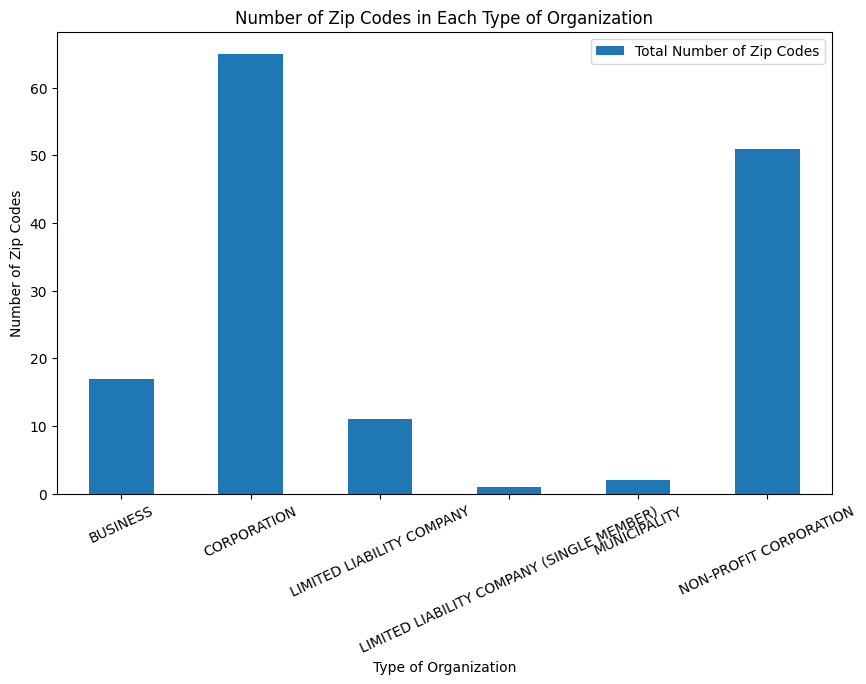

In [142]:
# Plotting the bar plots for Number of zipcodes in each type of organization
organization_data.plot(x='Type of Organization', y='Total Number of Zip Codes', kind='bar', figsize=(10, 6))
plt.title('Number of Zip Codes in Each Type of Organization')
plt.xlabel('Type of Organization')
plt.ylabel('Number of Zip Codes')
plt.xticks(rotation=25)
plt.show()

In [143]:
# # Plotting the bar plots for Total Facilities in each type of organization
# organization_data.plot(x='Type of Organization', y='Total Number of Facilities', kind='bar', figsize=(10, 6))
# plt.title('Number of Abuse Care Facilities in Each Type of Organization')
# plt.xlabel('Type of Organization')
# plt.ylabel('Number of Facilities')
# # plt.xticks(rotation=5)
# plt.show()

##Number of Facilities Available per Zip Code by Organization Type

From the bar chart provided, it can be noted that the average number of facilities per zipcode is nearly identical across all types of organizations.

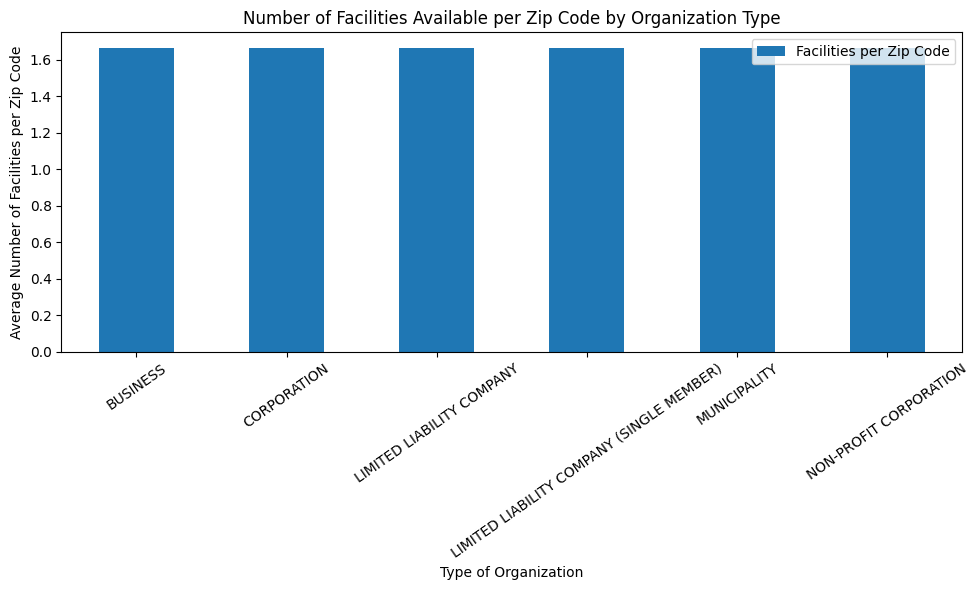

In [144]:
# Sum of total values of 'Total Number of Facilities' and 'Total Number of Zip Codes'
total_facilities = organization_data['Total Number of Facilities'].sum()
total_zip_codes = organization_data['Total Number of Zip Codes'].sum()
# Calculate 'Facilities per Zip Code' using the summed totals
organization_data['Facilities per Zip Code'] = total_facilities / total_zip_codes
#plot bar graph
organization_data.plot(x='Type of Organization', y='Facilities per Zip Code', kind='bar', figsize=(10, 6))
# Add labels and title
plt.xlabel('Type of Organization')
plt.ylabel('Average Number of Facilities per Zip Code')
plt.title('Number of Facilities Available per Zip Code by Organization Type')
plt.xticks(rotation=35)
# Display the bar chart
plt.tight_layout()
plt.show()

## Number of Organizations Issued Each Year

The interactive line chart below depicts the trends in the number of organizations established each year from 2016 to 2022. Fluctuations, both upward and downward, are noticeable in the 'Corporation' and 'Non-Profit Corporation' types of organizations, with the 'Non-Profit Corporation' type currently having the most facilities. The remaining types are less common, with 'Municipality' being the least prevalent.

In [145]:
#How many Abuse care facilities were issued in each year
organization_count_by_year = ct_pop_facilities_zip.groupby(['Type of Organization', ct_pop_facilities_zip['Issued date'].dt.year]).size().reset_index(name='Count')
# Create an interactive line chart
fig = px.line(organization_count_by_year, x='Issued date', y='Count', color='Type of Organization')
# Customize the layout
fig.update_layout(
    title='Number of Organizations Issued Each Year',
    xaxis_title='Year',
    yaxis_title='Number of Organizations Issued',
    template='plotly_white')
# Show the interactive plot
fig.show()

## Total Number of Facilities in each Type of Organization
The interactive bar graph below allows us to examine the number of facilities in each type of organization. The 'Non-profit corporation' type has the most facilities (107), while the 'Limited Liability Company(single member)' type has the fewest (1).

In [146]:


# Bar graph for number of available facilities in each type of organization
fig = px.bar(grouped_organization_data, x='Type of Organization', y='Total Number of Facilities')

# Customize the chart
fig.update_layout(
    title='Total Number of Facilities by Type of Organization',
    xaxis_title='Type of Organization',
    yaxis_title='Total Number of Facilities',
    template='plotly_white')

# Show the plot
fig.show()

#The Locations of Substance Abuse Care Fcilities based on Zipcode

#PSEUDOCODE
Interactive maps were generated using the Google application 'create a map'. The files `formatted_df` and `ct_pop_facilities_zip` were uploaded to the application to create the maps titled `Substance Abuse Care Facilities` and `Substance Abuse Care Facilities by Type Of Organization`, respectively. The iframe link was then extracted from the application and the map was displayed using the `HTML()` function from the `Iframe` library.

In [147]:
# Embed a Google Map using an iframe
iframe = """
<iframe src="https://www.google.com/maps/d/embed?mid=1r9VY1LlRRZ83L6YvdIjkt4U4WJNXmJA&ehbc=2E312F" width="640" height="480"></iframe>
"""
# Display the iframe
HTML(iframe)


The Google map displayed above provides a visual representation of the locations of abuse care facilities, determined by their addresses and zip codes. It's noticeable that a majority of these facilities are situated in the lower and upper left corners of the state, making them readily accessible to the population residing in those areas. However, this distribution poses a challenge for those living in the right half of the state due to the relative scarcity of facilities in their vicinity.

#The Locations ofSubstance Abuse Care Fcilities based on Type of Organization

In [148]:
# Embed a Google Map using an iframe
iframe = """
<iframe src="https://www.google.com/maps/d/embed?mid=1vawIDGV977m3v1b2nEmk-JrPgfj_Bxw&ehbc=2E312F" width="640" height="480"></iframe> """
# Display the iframe
HTML(iframe)

The map displayed above indicates the locations of abuse care facilities, categorized by the type of organization. As we've previously noted, 'Non-profit corporations' constitute a significant portion of these facilities. This is advantageous as these organizations could potentially offer free services to individuals battling addiction.

#Summary

After analyzing the Connecticut population data, it has been observed that the availability of substance abuse care facilities per person varies significantly by the type of organization. Here is a summary of the findings:

- **Businesses** have an availability of **8.007979** facilities per person.
- **Corporations** offer **42.209551** facilities per person.
- **Limited Liability Companies (LLC)** provide **4.707386** facilities per person.
- **Single Member LLCs** have a minimal presence with only **0.040548** facilities per person.
- **Municipalities** offer **0.568758** facilities per person.
- **Non-Profit Corporations** have the highest availability with **44.465779** facilities per person.

It is evident that **municipality-run facilities** are less available compared to other types of organizations. Given the role of municipalities in addressing public health concerns, increasing the number of municipality-run substance abuse care facilities could be beneficial. Such facilities are often more accessible to the general public and may provide services that are integrated with other community health programs. Enhancing the availability of these facilities could lead to improved public health outcomes and better support for individuals dealing with substance abuse issues within the community. It is crucial to consider the potential impact on public health and resource allocation when planning to increase the number of municipality-run facilities for substance abuse care.

**References**

1.Ungemack, J. (2020a). Trends in Substance Use in Connecticut and the Impacts of COVID-19 Alcohol and Drug Policy Council. https://portal.ct.gov/-/media/DMHAS/ADPC/Presentations/3-ADPC-SA-Trends-in-CT

<br>

2.DMHAS Bed Availability. CT.gov - Connecticut’s Official State Website. Retrieved December 16, 2023, from https://portal.ct.gov/DMHAS/Programs-and-Services/Finding-Services/DMHAS-Bed-Availability

<br>

3.Connecticut Population 1900-2022. (2022a). Macrotrends.net. https://www.macrotrends.net/states/connecticut/population

<br>

4.Opioid vs Non-Opioid Prescriptions by Year - ARCHIVE. (2023, December 14). Data.gov; data.ct.gov. https://catalog.data.gov/dataset/opioid-vs-non-opioid-prescriptions-by-year

<br>

5.Percent of Prescriptions Greater than 90 MME vs. All - ARCHIVE. (2023, December 14). Data.gov; data.ct.gov. https://catalog.data.gov/dataset/percent-of-prescriptions-greater-than-90-mme-vs-all

<br>

6.New vs. Refill Controlled Substance Prescriptions - ARCHIVE. (2023, December 14). Data.gov; data.ct.gov. https://catalog.data.gov/dataset/new-vs-refill-controlled-substance-prescriptions

<br>

7.Zip Codes in Connecticut. Www.connecticut-Demographics.com. Retrieved December 16, 2023, from https://www.connecticut-demographics.com/zip_codes_by_population

<br>

8.Substance Abuse Care Facilities | Connecticut Data. Data.ct.gov. Retrieved December 16, 2023, from https://data.ct.gov/Health-and-Human-Services/Substance-Abuse-Care-Facilities/htz8-fxbk/about_data

<br>

9.Python String zfill() Method. Www.w3schools.com. https://www.w3schools.com/python/ref_string_zfill.asp


#Google drive link for the  data sets
https://drive.google.com/drive/folders/1FXjoO5k4OAasiJmJOkEdk3SlyUb4puzv?usp=sharing
